# Визуализация датасета для регрессии

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

## Загрузка и подготовка данных

In [2]:
path_to_file = "../datasets/regression/metro_interstate_traffic_volume.csv"
traffic_df = pd.read_csv(path_to_file, sep=',')

In [3]:
traffic_df

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

In [4]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Признаки *weather_main* и *weather_description* **коррелируют** по смыслу, поэтому один из них можно "дропнуть"

In [10]:
traffic_df = traffic_df.drop(columns=['weather_main'])

## Визуализация

In [14]:
cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
sns.pairplot(traffic_df[cols].sample(frac=1).iloc[:3000])

По данным графикам можно сделать выводы, что, например, **наибольший объём трафика** в те моменты, когда *температура* находит в пределах от 250 до 300 градусов по Фаренгейту или когда *количество осадков* близко к 0 мм/час. 

Посмотрим подробнее на распределение следующих признаков: *temp*, *rain_1h*

c:\users\oleg-\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

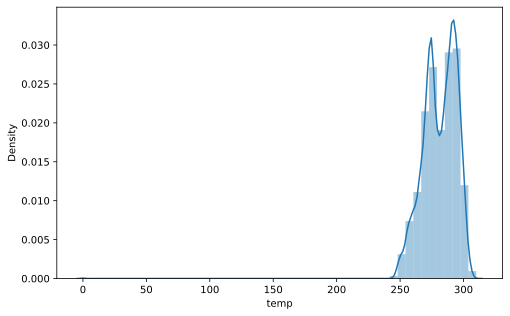

In [15]:
sns.distplot(traffic_df.temp)

c:\users\oleg-\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rain_1h', ylabel='Density'>

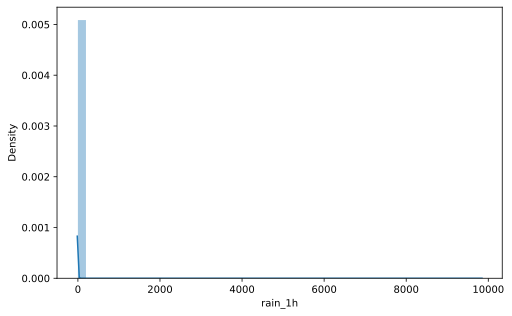

In [16]:
sns.distplot(traffic_df.rain_1h)

**Выводы по графикам:**   
- распределение признака *temp* близко к нормальному (на самом деле, зуб какой-то)   
- распределение признака *rain_1h* таково, что подавляющее большинство времени количество осадков было в районе 0 мм/час  

Посмотрим распределение целевого признака по *holiday* и *weather_description* 

<AxesSubplot:xlabel='weather_description', ylabel='holiday'>

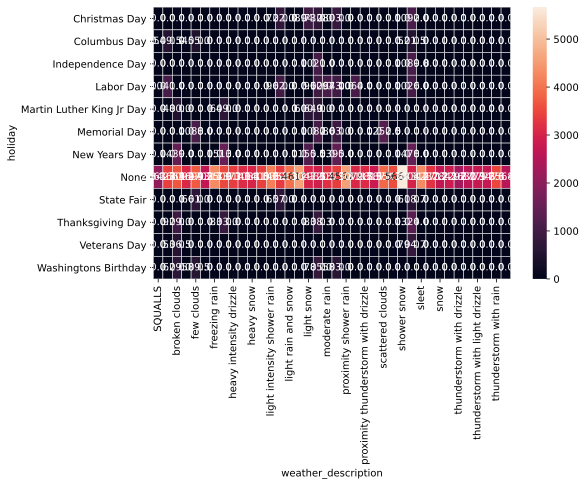

In [31]:
from statistics import mean


pivot_table = traffic_df.pivot_table(
                        index='holiday', 
                        columns='weather_description', 
                        values='traffic_volume', 
                        aggfunc=mean).fillna(0).applymap(float)
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5)

Наибольший объём трафика в дни, когда нет **никаких праздников**

<AxesSubplot:xlabel='traffic_volume', ylabel='holiday'>

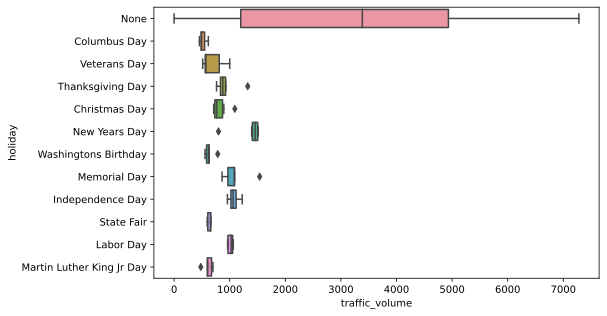

In [33]:
feature = 'holiday'
sns.boxplot(y=feature, x='traffic_volume', data=traffic_df[[feature, 'traffic_volume']], orient='h')

Наибольшая дисперсия точек, кроме выбросов, в значении ***None***